https://ui.adsabs.harvard.edu/abs/2020AJ....160..219F/abstract

In [1]:
import chronos as cr

cr.star.VIZIER_KEYS_PROT_CATALOG

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


{'Feinstein2020_NYMG': 'See data/Feinstein2020_NYMG.txt',
 'McQuillan2014_Kepler': 'J/ApJS/211/24',
 'Nielsen2013_KeplerMS': 'J/A+A/557/L10',
 'Barnes2015_NGC2548': 'J/A+A/583/A73',
 'Meibom2011_NGC6811': 'J/ApJ/733/L9',
 'Curtis2019_NGC6811': 'J/AJ/158/77',
 'Douglas2017_Praesepe': 'J/ApJ/842/83',
 'Rebull2016_Pleiades': 'J/AJ/152/114',
 'Rebull2018_USco_rhoOph': 'J/AJ/155/196',
 'Rebull2020_Taurus': 'J/AJ/159/273',
 'Douglas2014_PraesepeHyades': 'J/ApJ/795/161',
 'Reinhold2020_K2C0C18': 'J/A+A/635/A43',
 'Douglas2019_Praesepe': '2019ApJ...879..100D',
 'Fang2020_PleiadesPraesepeHyades': '2020MNRAS.495.2949F',
 'Gillen2020_BlancoI': '2020MNRAS.492.1008G',
 'Canto2020_TOIs': 'J/ApJS/250/20'}

## Upper Sco (8 Myr) & Rho Oph (1 Myr) (Rebull+2016)

In [2]:
#members, K2
key = cr.star.VIZIER_KEYS_PROT_CATALOG['Rebull2018_USco_rhoOph']
USco_rhoOph = cr.get_vizier_tables(key, tab_index=0, row_limit=-1)

Columns: Index(['EPIC', 'RAJ2000', 'DEJ2000', 'Vmag', 'Ksmag', '__V-Ks_u', 'E_V-Ks_',
       'Ksmag0', 'Per1', 'Per2', 'Per3', 'Per4', 'Disk', 'Simbad'],
      dtype='object')
Shape: (1313, 14)


<AxesSubplot:xlabel='__V-Ks_u', ylabel='Per2'>

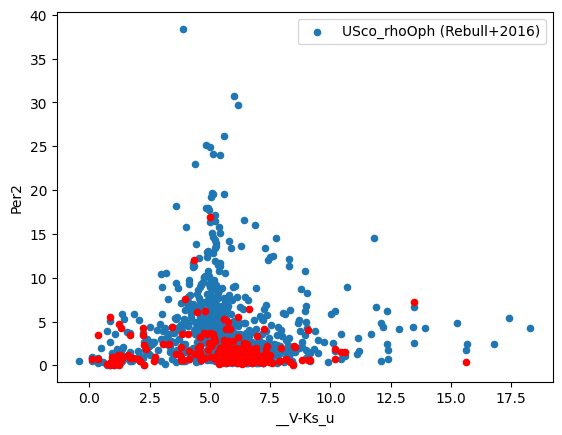

In [3]:
ax = USco_rhoOph.plot.scatter(x='__V-Ks_u', y='Per1', label='USco_rhoOph (Rebull+2016)')
USco_rhoOph.plot.scatter(x='__V-Ks_u', y='Per2', ax=ax, color='r')

## Pleiades (800 Myr) (Rebull+2016)

In [4]:
key = cr.star.VIZIER_KEYS_PROT_CATALOG['Rebull2016_Pleiades']
pleiades = cr.get_vizier_tables(key, tab_index=0, row_limit=-1)

Columns: Index(['EPIC', 'RAJ2000', 'DEJ2000', 'Vmag', 'Ksmag', '__V-K_0', 'Prot', 'Mm',
       'P', 'dd', 'ddm', 'shch', 'beat', 'cpeak', 'resc', 'resd', 'dScu',
       'cloud', 'PapI', 'PapIII', 'Simbad'],
      dtype='object')
Shape: (759, 21)


<AxesSubplot:xlabel='__V-K_0', ylabel='Prot'>

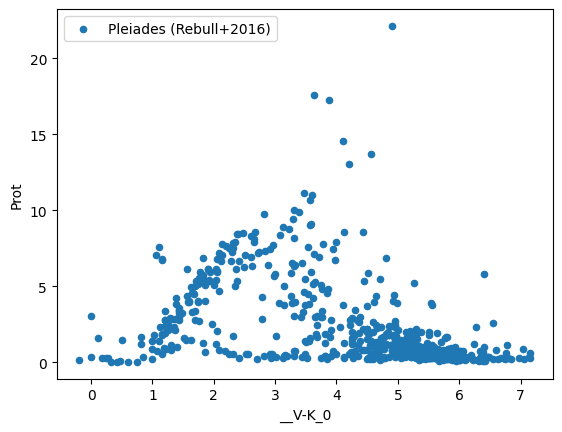

In [5]:
pleiades.plot.scatter(x='__V-K_0', y='Prot', label='Pleiades (Rebull+2016)')

<AxesSubplot:xlabel='__V-K_0', ylabel='Prot'>

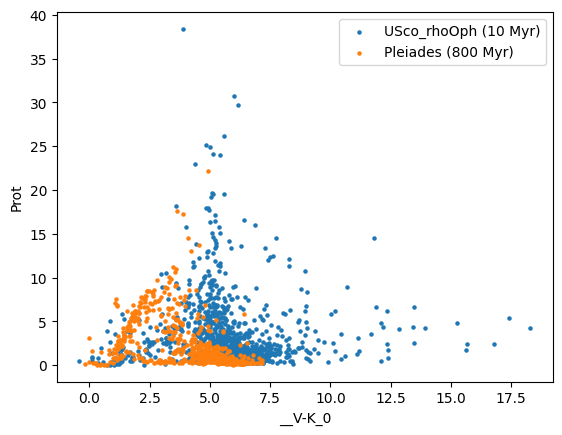

In [6]:
ax = USco_rhoOph.plot.scatter(x='__V-Ks_u', y='Per1', label='USco_rhoOph (10 Myr)', marker='.')
pleiades.plot.scatter(x='__V-K_0', y='Prot', label='Pleiades (800 Myr)', c='C1', marker='.', ax=ax)

In [7]:
def func(x, param='BP-RP', key='I/345/gaia2'):
    return cr.Target(epicid=x)\
            .query_vizier_param(param)\
            .get(key)

In [8]:
USco_rhoOph = USco_rhoOph.head(200)

In [9]:
import swifter

param = 'BP-RP'
USco_rhoOph[param] = USco_rhoOph['EPIC'].swifter.apply(func)

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

In [ ]:
pleiades[param] = pleiades['EPIC'].swifter.apply(func)

## Psc Eri (120 Myr) (Curtis+2019)

In [12]:
key = cr.star.VIZIER_KEYS_PROT_CATALOG['Curtis2019_NGC6811']

#Psc-Eri stream mem from Meingast+2019
PscEri= cr.get_vizier_tables(key, tab_index=0, row_limit=-1)
PscEri.columns, PscEri.shape

Columns: Index(['Seq', 'f_Seq', 'Source', 'RA_ICRS', 'DE_ICRS', 'GBP-GRP', 'Teff',
       'Gmag', 'GMag', 'Prot', 'Note', 'Simbad'],
      dtype='object')
Shape: (101, 12)


(Index(['Seq', 'f_Seq', 'Source', 'RA_ICRS', 'DE_ICRS', 'GBP-GRP', 'Teff',
        'Gmag', 'GMag', 'Prot', 'Note', 'Simbad'],
       dtype='object'),
 (101, 12))

<AxesSubplot:xlabel='BP-RP', ylabel='Per1'>

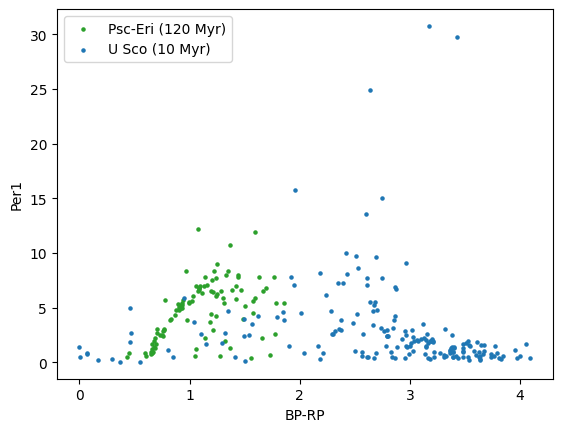

In [16]:
ax = PscEri.plot.scatter(x='GBP-GRP', y='Prot', label='Psc-Eri (120 Myr)', c='C2', marker='.')
USco_rhoOph.plot.scatter(x='BP-RP', y='Per1', label='U Sco (10 Myr)', c='C0', marker='.', ax=ax)

In [ ]:
def get_param(df):
    
    val = cr.Target(epicid=x).\
        query_vizier_param('BP-RP')\
        ['I/345/gaia2']
    
dfs = [df[column].to_frame() for column in df.columns]
with mp.Pool(mp.cpu_num) as pool:
    processed_df = pd.concat(pool.map(f, dfs), axis=1)

## Reinhold+2020

In [8]:
key = cr.star.VIZIER_KEYS_PROT_CATALOG['Reinhold2020_K2C0C18']
df = cr.get_vizier_tables(key, tab_index=0, row_limit=-1)
df.columns

Index(['EPIC', 'Campaign', 'Teff', 'logg', 'Prot', 'e_Prot', 'HPeak', 'Rvar',
       'Kpmag', 'GMAG', '_RA', '_DE'],
      dtype='object')

## NGC2548 (Barnes+2015)

In [3]:
key = cr.star.VIZIER_KEYS_PROT_CATALOG["Barnes2015_NGC2548"]
ngc2548 = cr.get_vizier_tables(key, tab_index=0, row_limit=-1)

Columns: Index(['Id', 'Vmag', 'B-V', 'Per', 'e_Per', 'Amp', 'e_Amp', 'Memb', 'Prov',
       'Name'],
      dtype='object')


<AxesSubplot:xlabel='B-V', ylabel='Per'>

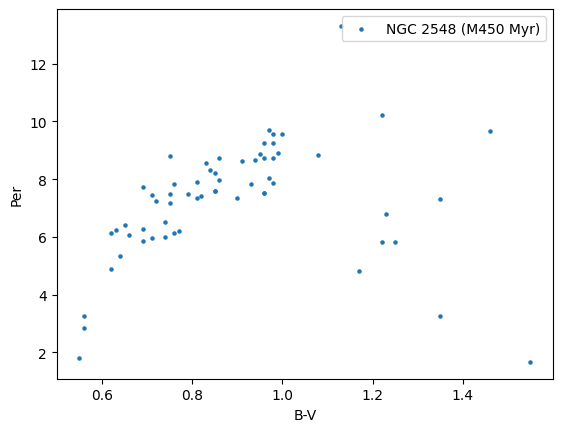

In [25]:
ngc2548.plot.scatter(x='B-V', y='Per', label='NGC 2548 (M450 Myr)', marker='.')

## Feinstein+2020

In [3]:
import pandas as pd

pd.read_csv('../chronos/data/feinstein2020.txt')

,TIC,Teff,Flare_rate,Period_days
0,134947,3286.0,0.851026,1.321325
1,671393,3096.0,0.000000,0.437796
2,1223040,3172.0,0.251992,0.843112
3,1232360,0.0,0.000000,2.363182
4,1273249,0.0,0.000000,1.800985
...,...,...,...,...
1526,468330671,0.0,0.351719,2.206000
1527,469171560,4911.0,0.124019,10.725478
1528,609530751,0.0,0.000000,2.617656
1529,611620106,3985.0,0.514022,3.121375


## paper

In [13]:
import pandas as pd

pd.read_csv('../chronos/data/Feinstein2020.csv')

,Population,Age [Myr],Count,Age Ref.
0,AB Doradus,149+51−19,283,Bell et al. (2015)
1,Argus,40-50,38,Zuckerman (2019)
2,β Pictoris,24±3,144,Bell et al. (2015)
3,Carina,45+11−7,78,Bell et al. (2015)
4,Carina-Near,∼200,57,Zuckerman et al. (2006)
5,Columba,42+6−4,129,Bell et al. (2015)
6,eta Chamaeleontis,3.7+4.6−1.4,14,Murphy et al. (2013)
7,η Chamaeleontis,11±3,3,Bell et al. (2015)
8,Hyades,750±100,61,Brandt & Huang (2015)
9,IC2391,50±5,7,Barrado y Navascues et al. (2004)
